# Оглавление <a name="шаг-0"></a>
   [Рынок заведений общественного питания Москвы.  Введение](#0)
   
1. [Загрузка файлов и подготовка к анализу](#1)

2. [Анализ данных](#2)
    
    2.1. [Исследование соотношения видов объектов общественного питания по количеству. Построение графика.](#2-1) 
    
    2.2. [Исследование соотношения  сетевых и несетевых заведений по количеству. Построение графика.](#2-2) 
    
    2.3. [Для какого вида объекта общественного питания характерно сетевое распространение?](#2-3) 
    
    2.4. [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#2-4) 
    
    2.5. [Описание среднего количества посадочных мест для каждого вида объекта общественного питания. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построение графика.](#2-5) 
    
    2.6. [Выделение в отдельный столбец информации об улице из столбца address.](#2-6) 
    
    2.7. [Построение графика топ-10 улиц по количеству объектов общественного питания. С использованием внешней информации сформировать ответ на вопрос  — в каких районах Москвы находятся эти улицы?](#2-7)
    
    2.8. [Поиск числа улиц с одним объектом общественного питания. С использованием внешней информации сформировать ответ на вопрос — в каких районах Москвы находятся эти улицы?](#2-8) 
    
    2.9. [Оценка распределения количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявление закономерностей.](#2-9) 

3. [Выводы и рекомендации](#3)

4. [Презентация](#4)

# Рынок заведений общественного питания Москвы.  Введение <a name="0"></a>

**Целью**  исследования рынка заведений общественного питания в Москве является привлечение инвестиций для открытия небольшого кафе. Кафе -  дорогой, но многообещающий проект с уникальной особенностью: гостей обслуживают роботы. 

**Целевая аудитория презентации:** потенциальные инвесторы, которых интересует текущее положение дел на рынке и способность проекта удержаться на этом рынке.

**Задачи исследования:** 
1.	Исследование соотношения видов объектов общественного питания по количеству. Построение графика.
2.	Исследование соотношения  сетевых и несетевых заведений по количеству. Построение графика.
3.	Для какого вида объекта общественного питания характерно сетевое распространение?
4.	Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
5.	Описание среднего количества посадочных мест для каждого вида объекта общественного питания. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построение графика.
6.	Выделение в отдельный столбец информации об улице из столбца address.
7.	Построение графика топ-10 улиц по количеству объектов общественного питания. С использованием внешней информации сформировать ответ на вопрос  — в каких районах Москвы находятся эти улицы?
8.	Поиск числа улиц с одним объектом общественного питания. С использованием внешней информации сформировать ответ на вопрос — в каких районах Москвы находятся эти улицы?
9.	Оценка распределения количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявление закономерностей.
10. Формирование  рекомендаций о виде заведения, количестве посадочных мест, а также районе расположения. Описание возможности развития сети.
 

Данные для анализа:
  
**Таблица rest_data:**

    -id — идентификатор объекта;
    -object_name — название объекта общественного питания;
    -chain — сетевой ресторан;
    -object_type — тип объекта общественного питания;
    -address — адрес;
    -number — количество посадочных мест.

# 1. Загрузка файлов и подготовка к анализу <a name="1"></a>

In [98]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
from scipy import stats as st
from scipy.stats import norm
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [99]:
try:
    rest_data= pd.read_csv('/datasets/rest_data.csv') 
except:
    rest_data= pd.read_csv(r'C:\Users\Larissa Olifirova\Desktop\Яндекс практикум\8.Презентации\rest_data.csv')

In [100]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [101]:
rest_data.sample(10)

,id,object_name,chain,object_type,address,number
6805,23705,Столовая ГБОУ Школа № 2005,нет,столовая,"город Москва, Родионовская улица, дом 6/7",194
5476,25907,Лунный дворик,нет,ресторан,"город Москва, Новая Басманная улица, дом 23А, ...",90
6235,25517,La Piazza,нет,кафе,"город Москва, улица Адмирала Лазарева, дом 24",90
1575,19906,Кафе «Делишес»,нет,кафе,"город Москва, Рублёвское шоссе, дом 48/1",60
5106,27946,СТОЛОВАЯ при ВНИИЖТ,нет,столовая,"город Москва, 3-я Мытищинская улица, дом 10, с...",100
1962,24330,Шоколадница,да,кафе,"город Москва, улица Пречистенка, дом 40/2, стр...",48
11740,188584,Шаурма 24,нет,магазин (отдел кулинарии),"город Москва, поселение Московский, деревня Са...",0
5800,26244,Гавана,нет,ресторан,"город Москва, Рязанский проспект, дом 2Б",80
13788,219173,Бонжур Сити,нет,закусочная,"город Москва, поселение Сосенское, посёлок Ком...",0
6131,23882,Бургер Кинг,да,кафе,"город Москва, Профсоюзная улица, дом 102, стро...",50


In [102]:
rest_data.duplicated().sum() #проверка на наличие дубликатов

0

In [103]:
rest_data['id'].nunique()

15366

In [104]:
rest_data.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


Описательная таблица показывает, что максимальное количество мест для одного заведения - 1700, минимальное  - 0. Проверим, насколько эти данные корректны. 

In [105]:
display(rest_data[rest_data['number'] >1000])

,id,object_name,chain,object_type,address,number
2313,26560,Ресторан «АЛЬФА»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корп...",1040
3686,27026,РУМ СЕРВИС,нет,ресторан,"город Москва, площадь Европы, дом 2",1200
4480,27024,РУМ СЕРВИС,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, с...",1200
8148,80291,Банкетный зал Шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом...",1500
8345,27750,СТОЛОВАЯ-БУФЕТ,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,нет,столовая,"город Москва, проспект Вернадского, дом 84, ст...",1288
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


In [106]:
display(rest_data[rest_data['number']==0].sample(5))

,id,object_name,chain,object_type,address,number
13021,201642,Шаурма,нет,кафе,"город Москва, Хорошёвское шоссе, дом 72А, стро...",0
10343,184521,КофеLike,нет,кафетерий,"город Москва, Ленинградское шоссе, дом 13, кор...",0
8489,148615,Dim Sum & Co,нет,кафе,"город Москва, поселение Сосенское, Калужское ш...",0
14589,214761,Плов Тут,нет,предприятие быстрого обслуживания,"город Москва, Большая Тульская улица, дом 13",0
13209,200432,Кафе «Prime Star»,нет,кафе,"город Москва, улица Сергея Макеева, дом 13",0


In [107]:
zero = rest_data[rest_data['number']==0]
zero['number'].count()                         

1621

Заведения с количеством мест более 1000 представляют собой большие пространства развлекательного направления: банкетные залы, или, как в случае с Arena by Soho Family, концертные площадки. 
Заведения с количеством мест ноль представлены предприятиями типа "закусочная", "кулинария" и "предприятия быстрого обслуживания. В этих заведениях практически всегда работает система самообслуживания.

Посмотрим как распределены данные по количеству мест в заведениях:

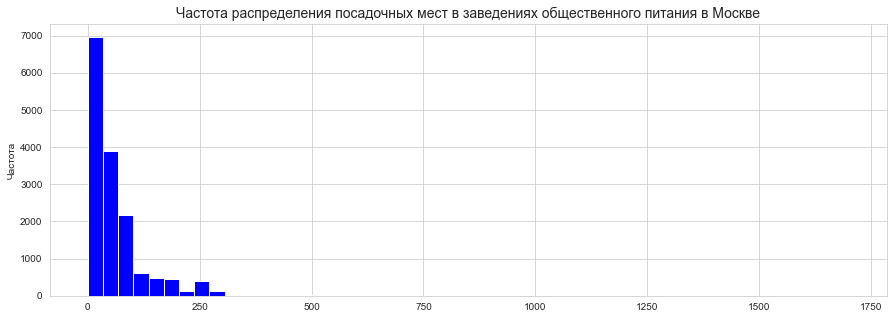

In [108]:
plt.figure(figsize = (15, 5))
rest_data['number'].hist(bins = 50, color= 'blue')
plt.title('Частота распределения посадочных мест в заведениях общественного питания в Москве', fontsize = 14)
plt.ylabel('Частота');

In [109]:
#таже построим боксплот:
fig = px.box(rest_data, y="number", title='Распределение посадочных мест' )
fig.show();

Анализ распределения данных показал, что по количеству мест данные содержат большое число нулей. Боксплот показывает также, что количество мест более 750 является скорее выбросами. Посчитаем 95, 98 и 99 персентили для определения выбросов:

In [110]:
np.percentile(rest_data['number'], [95, 98, 99])

array([214., 250., 300.])

Таким образом, не более 5% мест общественного питания содержат более 214 посадочных мест, 2% - более 250  мест и 1% содержат более 300 мест. 
Не смотря на то, что количество посадочных мест более 214 относятся к аномальным, не будем их удалять по следующим двум причинам:
1) именно большие пространства ресторанных залов с многочисленными посадочными местами могут являться наиболее привлекательными для реализации проекта с технической и экономической точек зрения;
2) относительно небольшая доля больших пространств на рынке общественного питания делает этот формат наиболее привлекательным сегментом для нового проекта.

Другая ситуация с заведениями с количеством посадочных мест 0 - 1621 предприятие. Это заведения с системой самообслуживания.

<div> <h5 style="color:green"> С дубликатами поступаю так: 

In [111]:
rest_data_no_duplicates= rest_data.copy() #копирую df 

In [112]:
rest_data_no_duplicates.drop(['id'], axis='columns',inplace=True)#удаляю столбец id в дубле датафрейма

In [113]:
rest_data_no_duplicates.duplicated().sum()

82

In [114]:
82/15366

0.005336457113106859

При удалении столбца с идентификационными номерами получаем 82 дубля, что составляет 0,53% 

In [115]:
duplicates = rest_data_no_duplicates[rest_data_no_duplicates.duplicated(keep=False)] 

In [116]:
duplicates.head(20) #смотрим, что дублируется

,object_name,chain,object_type,address,number
2374,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2381,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2869,LALTRO BOSCO,нет,ресторан,"город Москва, улица Петровка, дом 10",145
3480,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
3481,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4430,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4431,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4536,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
4537,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5058,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20


In [117]:
#проверим, есть ли в дублях сетевые заведения:
duplicates.query('chain =="да"')

,object_name,chain,object_type,address,number
6664,Кофе Хаус,да,ресторан,"город Москва, площадь Киевского Вокзала, дом 2",30
6665,Кофе Хаус,да,ресторан,"город Москва, площадь Киевского Вокзала, дом 2",30
11996,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Сходненская улица, дом 37",0
11997,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Сходненская улица, дом 37",0
12008,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0
12046,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
15173,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0
15217,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0


Учитывая, что в дублях подавляющее большинство строк относится к несетевым объектам, то можно предположить, что появление дубликатов  - техническая ошибка при формировании базы данных. Эти данные можно удалить, но их количество менее одного процента позволяет эти данные оставить

# Вывод:
Данные содержат 15366 уникальных строк, каждая из которых представляет конкретное заведение общественного питания г.Москва. Пропуски отсутствуют. В базе данных есть 82 дублирующихся позиции, связанных с большой вероятностью, с технической ошибкой. 
Данные содержат предприятия с количеством мест более 214, которые оцениваются как аномальные, но не будут удалены из анализа.

#### [Вернуться к оглавлению](#шаг-0)

# 2. Анализ данных <a name="2"></a>

# 2.1. Исследование соотношения видов объектов общественного питания по количеству. Построение графика. <a name="2-1"></a>

In [118]:
obj_type = rest_data.groupby('object_type')['id'].count()

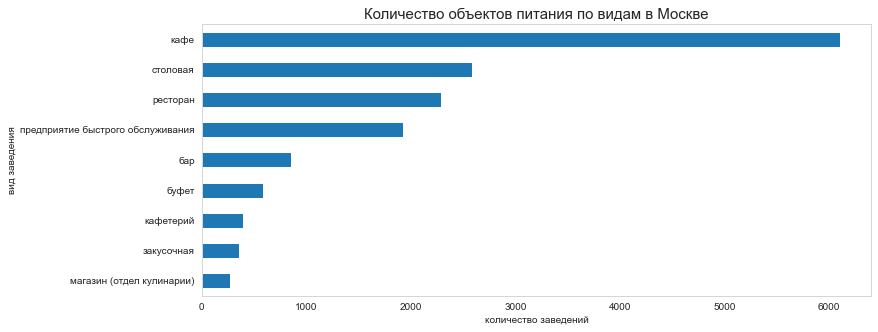

In [119]:
obj_type.sort_values(ascending=True).plot(figsize=(12,5), kind='barh', cmap = 'tab10')
plt.title('Количество объектов питания по видам в Москве', fontsize = 15)
plt.ylabel('вид заведения')
plt.xlabel('количество заведений')
plt.grid();

# КАК ЕЩЁ МОЖНО ПОСТРОИТЬ ГРАФИК С ДАННЫМИ ЦИФРОВЫМИ И ПРОЦЕНТНЫМИ ОДНОВРЕМЕННО:

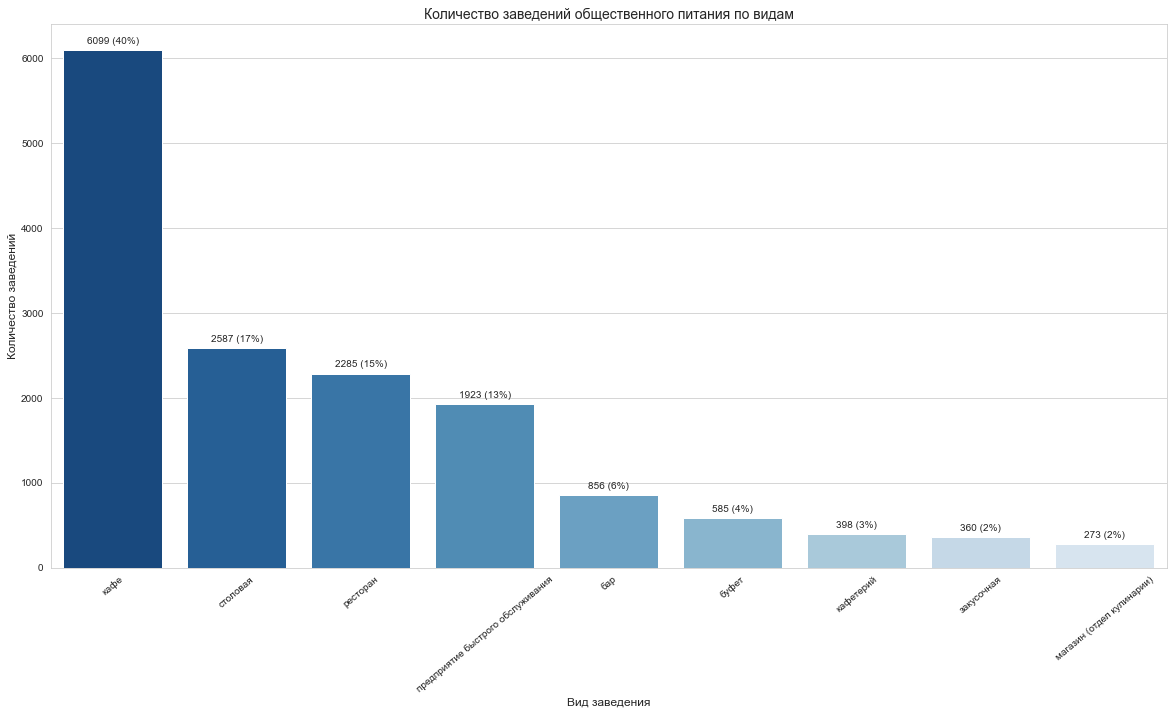

In [120]:
#сформируем таблицу для построения графика
obj_count = rest_data['object_type'].value_counts().reset_index()
obj_count.columns = ['type', 'count']

plt.show()
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.set_palette('Blues_r', 10) 
bar = sns.barplot(x='type', y='count', data = obj_count,
                 order = obj_count.sort_values('count', ascending = False).type)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f')+' ('+ format(p.get_height()/obj_count['count'].sum()*100, '.0f') + '%)', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
bar.set_xticklabels(obj_count.sort_values('count', ascending = False)['type'],rotation=40)
plt.title("Количество заведений общественного питания по видам", fontsize = 14)
plt.xlabel('Вид заведения', fontsize = 12)
plt.ylabel('Количество заведений', fontsize = 12);

In [121]:
obj_type= obj_type.reset_index()
summ=obj_type['id'].sum()
obj_type['percntge'] = obj_type['id']/summ
obj_type['percntge'] =  obj_type['percntge'].map('{:.1%}'.format)

In [122]:
obj_type.sort_values(by = 'id', ascending=False)

,object_type,id,percntge
3,кафе,6099,39.7%
8,столовая,2587,16.8%
7,ресторан,2285,14.9%
6,предприятие быстрого обслуживания,1923,12.5%
0,бар,856,5.6%
1,буфет,585,3.8%
4,кафетерий,398,2.6%
2,закусочная,360,2.3%
5,магазин (отдел кулинарии),273,1.8%


# Вывод:
Наиболее распространённым типами заведений общественного питания являются кафе (39,7%), столовая (16,8%), ресторан (14,9%) и предприятие быстрого обслуживания(12,5%). Вместе они составляют 83.9% от общего количества заведений.

# 2.2. Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика. <a name="2-2"></a>

In [123]:
chane = rest_data.pivot_table(index='chain', values='id', aggfunc='count')
#chane= chanerest_data.reset_index().replace(['да', 'нет'], ['cетевые', 'неcетевые'])

In [124]:
chane

,id
chain,
да,2968
нет,12398


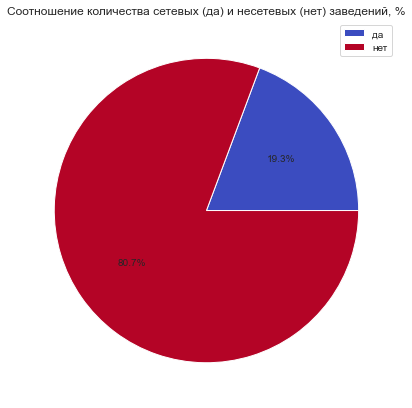

In [125]:
chane.plot(kind='pie',  y='id', labels=None, label='' , autopct='%1.1f%%', legend=True, figsize=(7, 7), cmap = 'coolwarm', title='Соотношение количества сетевых (да) и несетевых (нет) заведений, %')
plt.show()

In [126]:
#таже построим боксплот для сетевых и несетевых объектов:
fig = px.box(rest_data, y='number', title='Распределение посадочных мест для сетевых и несетевых объектов', color='chain')
fig.show();

In [127]:
chain_yes=rest_data[rest_data['chain']=='да']
chain_not=rest_data[rest_data['chain']=='нет']

In [128]:
np.percentile(chain_not['number'], [ 95, 98, 99]) #выбросы для несетевых объектов

array([230.  , 257.12, 300.  ])

In [129]:
np.percentile(chain_yes['number'], [ 95, 98, 99]) #выбросы для сетевых объектов

array([158.65, 217.66, 275.33])

# Вывод:
Несетевой формат заведений общественного питания на московском рынке является наиболее распространённым - 80,7%.
Как для сетевых, так и для несетевых объектов медианное  число посадочных мест в большинстве случаев равно 40. 
Для несетевых заведений общественного питания 2% объектов превышают 257 посадочных мест (выбросы), для сетевых  - 2%  превышают значение 217. Объекты с гигантским количеством посадочных мест более свойственны для несетевого формата. 

 # 2.3. Для какого вида объекта общественного питания характерно сетевое распространение? <a name="2-3"></a>

In [130]:
chain_type = rest_data.groupby(['chain', 'object_type'])['id'].agg('count').reset_index().sort_values(by='id', ascending=False)
chain_type

,chain,object_type,id
12,нет,кафе,4703
17,нет,столовая,2584
16,нет,ресторан,1741
3,да,кафе,1396
15,нет,предприятие быстрого обслуживания,1132
9,нет,бар,819
6,да,предприятие быстрого обслуживания,791
10,нет,буфет,574
7,да,ресторан,544
13,нет,кафетерий,346


In [131]:
fig = px.bar(chain_type, x='object_type', color='chain',   text='id', y='id',  title='Виды объектов общественного питания по принадлежности к сети')
#fig.layout.yaxis.tickformat = ',.0%'
fig.show()

In [132]:
rest_data.query('chain == "да" & object_type == "столовая"')

,id,object_name,chain,object_type,address,number
5234,20979,ГРАБЛИ,да,столовая,"город Москва, Ярославское шоссе, дом 26, корпус 1",120
5967,104941,Му-Му,да,столовая,"город Москва, Люблинская улица, дом 169, корпус 2",55
6574,78347,Гурман,да,столовая,"город Москва, Оршанская улица, дом 3",162


In [133]:
#строим таблицу с долями:
chain_type_yes = rest_data.query('chain == "да"').groupby(['chain', 'object_type'])['id'].agg('count').reset_index().sort_values(by='id', ascending=False)
chain_type_not = rest_data.query('chain == "нет"').groupby(['chain', 'object_type'])['id'].agg('count').reset_index().sort_values(by='id', ascending=False)
chain_percent = pd.merge(chain_type_yes, chain_type_not,  on='object_type')
chain_percent['chain_percent'] = (chain_percent['id_x']/(chain_percent['id_x']+chain_percent['id_y'])).map('{:.2%}'.format)
chain_percent['not_chain_percent'] = (chain_percent['id_y']/(chain_percent['id_x']+chain_percent['id_y'])).map('{:.2%}'.format)
chain_percent = chain_percent.drop(['chain_x', 'chain_y'], axis=1)
chain_percent.columns = ['object_type', 'chain_quantity', 'not_chain_quantity', 'chain_percent', 'not_chain_percent'] 
chain_percent=chain_percent.drop(['chain_quantity', 'not_chain_quantity'], axis=1)

chain_percent

,object_type,chain_percent,not_chain_percent
0,кафе,22.89%,77.11%
1,предприятие быстрого обслуживания,41.13%,58.87%
2,ресторан,23.81%,76.19%
3,магазин (отдел кулинарии),28.57%,71.43%
4,закусочная,15.56%,84.44%
5,кафетерий,13.07%,86.93%
6,бар,4.32%,95.68%
7,буфет,1.88%,98.12%
8,столовая,0.12%,99.88%


In [134]:
obj_name = chain_percent['object_type']
yes = chain_percent['chain_percent']
no = chain_percent['not_chain_percent']

chain = go.Bar(x = obj_name,  y = yes,  name = 'chain')
no_chain = go.Bar(x = obj_name, y = no, name = 'no_chain')

data = [chain, no_chain]
layout = go.Layout(barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
fig.show()

# Вывод:
Более всего сетевой формат характерен для предприятий быстрого обслуживания (доля сетевых заведений  - 41,1%). Значительно меньше сетевой формат популярен для видов  магазин-кулинария (28,6%), ресторан  (23,8%)  и кафе (22,9%). 
Реже других сетевой формат можно встретить в  столовых (0,1%), представленных заведениями "Грабли", "Му-Му" и "Гурман".

# 2.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?  <a name="2-4"></a>

In [135]:
#отсортируем сетевые объекты:
chain_data= rest_data.query('chain =="да"')

#группируем эти объекты по количеству и по среднему числу посадочных мест в сетях
chain_yes_group = chain_data.groupby('object_name').agg({'id': 'count', 'number': 'mean'}).reset_index()
chain_yes_group['number'] = chain_yes_group['number'].astype('int')
chain_yes_group.sort_values(by ='number').tail(10)

,object_name,id,number
234,КАФЕ «МУ-МУ»,1,250
537,РЕСТОРАН «ЧАЙХОНА №1»,1,250
508,Пражечка,1,266
623,Старина Миллер,1,280
713,Якитория и Ян Примус,1,282
328,Кафе МУ-МУ,1,300
714,Ян Примус,1,300
689,Чешская пивная «Козловица»,1,306
96,БАКИНСКИЙ БУЛЬВАР,1,350
651,Темпл Бар,1,356


In [136]:
# строим диаграмму
fig = px.scatter(chain_yes_group, x='number', y='id', labels={'number':'количество посадочных мест', 'id':'количество объектов' }, height=500)
fig.update_layout(title='Соотношение сетевых заведений общественного питания Москвы к среднему количеству посадочных мест')  
fig.show()

In [137]:
#рассчитаем  процентили распределения количества заведений в сетях:
np.percentile(chain_yes_group['id'], [50, 60, 70, 80, 90, 95, 98, 99])

array([ 1.  ,  1.  ,  2.  ,  3.  ,  6.  , 12.  , 31.  , 64.08])

In [138]:
#рассчитаем  процентили распределения количества посадочных мест:
np.percentile(chain_yes_group['number'], [ 50, 60, 70,80,90, 95, 99])

array([ 45.  ,  57.  ,  75.  ,  96.  , 134.4 , 164.85, 262.32])

# Вывод:
Согласно диаграмме распределения значений для сетевых объектов характерно мало заведений с большим числом посадочных мест:

в Москве 40% сетевых заведений представлены только одним объектом (мало заведений), и практически половина заведений имеют более 45 посадочных мест на одно заведение (много мест). 

# 2.5. Описание среднего количества посадочных мест для каждого вида объекта общественного питания. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построение графика.  <a name="2-5"></a>

In [139]:
#строим сводную таблицу для объектов по типу и среднему количеству посадочных мест
pivot_seats = rest_data.pivot_table(index='object_type', values='number', aggfunc='mean').astype('int')
#pivot_seats['number'] = pivot_seats['number'].astype('int')
pivot_seats['median'] = rest_data.pivot_table(index='object_type', values='number', aggfunc='median').astype('int')
pivot_seats = pivot_seats.sort_values(by ='number').reset_index()
pivot_seats.columns = ['object_type', 'mean', 'median']
pivot_seats

,object_type,mean,median
0,магазин (отдел кулинарии),5,0
1,закусочная,7,0
2,кафетерий,9,6
3,предприятие быстрого обслуживания,20,5
4,кафе,39,30
5,бар,43,35
6,буфет,51,32
7,ресторан,96,80
8,столовая,130,103


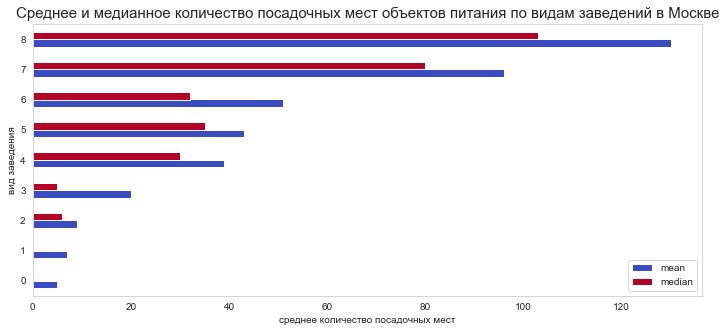

In [140]:
pivot_seats.plot(figsize=(12,5), kind='barh', cmap = 'coolwarm')
plt.title('Среднее и медианное количество посадочных мест объектов питания по видам заведений в Москве', fontsize = 15)
plt.ylabel('вид заведения')
plt.xlabel('среднее количество посадочных мест')
plt.grid();

# Вывод:
Наиболее  вместительными объектами общепита являются столовые - в среднем 130 посадочных мест, рестораны - в среднем расчитаны на  96 мест. Наименее вместительными являются магазины-кулинарии - 5 посадочных мест в среднем и закусочные  - 7 посадочных мест в среднем. Однако медианное значение показывает, что для  кулинарий и закусочных наличие мест не является характерным признаком.


# 2.6. Выделение в отдельный столбец информации об улице из столбца address.  <a name="2-6"></a>

In [141]:
rest_data['street'] = rest_data['address'].str.replace('город Москва, ', '') 
rest_data['street']  = rest_data['street'].str.split(',', expand=True) 
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


# 2.7. Построение графика топ-10 улиц по количеству объектов общественного питания. С использованием внешней информации сформировать ответ на вопрос — в каких районах Москвы находятся эти улицы?  <a name="2-7"></a>

In [142]:
#используем внешнюю ссылку на файл csv  с данными по районам Москвы:
district = pd.read_csv('https://raw.githubusercontent.com/Distans/temp/main/mosgaz-streets.csv')
district = district.drop(['areaid', 'okrug'], axis=1)
district.columns = ['streetname', 'district'] 
district.head() 

HTTPError: HTTP Error 404: Not Found

In [ ]:
#выберем 10 топ адресов:
streets= rest_data.pivot_table(index='street', values='id', aggfunc='count')
streets = streets.sort_values(by='id', ascending=False)
top10= streets.head(10)
top10

In [ ]:
#строим гистограмму:
top10.plot(kind = 'barh', figsize = (15,5), cmap = 'tab10', title = 'Топ-10 улиц по количеству заведений общественного питания');

In [ ]:
#объединим таблицы и определим районы:
top_10_str = pd.merge(top10, district, left_on='street', right_on='streetname', how='left')
top_10_str

In [ ]:
top_10_str.groupby('district')['id'].count().sort_values(ascending=False)

In [ ]:
top_10_str['district'].nunique()

In [ ]:
# определим, сколько в среднем районов охватывает  одна улица из топ-10:
top_10_str.groupby('streetname')['district'].count().reset_index()['district'].mean() 

# Вывод:
Наибольшее количество заведений расположено в городе Зеленограде  - 232. Далее в тройку улиц с наибольшим количеством мест общественного питания вошли  проспект Мира (204 заведения) и Профсоюзная улица (183 заведения). 

Десятка наиболее заполненных заведениями общественного питания улиц относится более чем к одному району. Всего таких районов для топ 10 улиц - 37 и заведения общественного питания в Москве не сосредоточены в каких-то отдельных районах. 

В среднем, одна улица из топ-10 охватывает 4,89 района.


# 2.8. Поиск числа улиц с одним объектом общественного питания. С использованием внешней информации сформировать ответ на вопрос — в каких районах Москвы находятся эти улицы?  <a name="2-8"></a>

In [ ]:
#выберем улицы с одним заведением:
one_for_street= streets.query('id ==1')
one_for_street.count()

In [ ]:
#мержим таблицы:
one_for_street_distrct = pd.merge(one_for_street, district, left_on='street', right_on='streetname', how='left')
one_for_street_distrct.count()

In [ ]:
top_district = one_for_street_distrct.groupby('district')['id'].count().sort_values(ascending=False).head(20)
top_district

In [ ]:
top_district.plot(kind='barh', figsize = (15,5), cmap = 'tab10', title = 'Районы с количеством улиц, где расположено только 1 заведение общественного питания');

# Вывод:
Всего улиц с одним заведением общественного питания - 541. Часть этих улиц относится более чем к одному району.
Районы, где расположено максимальное количество улиц с одним объектом общественного питания: 
- Таганский район         27 улиц 
- Район Хамовники         26 улиц
- Басманный район         25 улиц
- Тверской район          20 улиц
- Пресненский район       20 улиц


# 2.9. Оценка распределения количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявление закономерностей.  <a name="2-9"></a>

In [ ]:
matrix= rest_data.pivot_table(index = 'street', values = 'number', aggfunc = ['count','sum']).reset_index()
matrix.columns = ['street','places','seats']
matrix_20 = matrix.sort_values(by = 'places',ascending=False).head(20)

In [ ]:
x = matrix_20['places'].values
y = matrix_20['seats'].values
types = matrix_20.reset_index()['street'].values

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x, y)

ax.set_xlabel('places', fontsize=14)
ax.set_ylabel('seats', fontsize=14)
ax.set_title('Матрица соотношения количества заведений и количества посадочных мест (первые 20 улиц)', fontsize=18)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='.', color='blue')

#и добавим линию тренда:
z = np.polyfit(matrix_20['places'],matrix_20['seats'], 1)
p = np.poly1d(z)    
plt.plot(matrix_20['places'], p(matrix_20['places']),"r--")
plt.show()

#также создадим график для всего массива, чтобы оценить, где расположена основная масса заведений:
matrix.plot.scatter(x='places', y='seats', grid=True, figsize=(15,5), color = 'blue', alpha= 0.5, title = 'Все улицы: соотношение количества заведений общественного питания и посадочных мест')
plt.axis([0, 185, 0, 8000]) #удалёны аномальные значения;

Основной доле улиц соответствует количество заведений общественного питания от 1 до 15 с суммарным количеством мест от 0 до 1000. 

In [ ]:
#оценим наиболее распространённые адреса:
locations= rest_data.groupby('address')['id'].count().sort_values(ascending=False).head()
locations

Если рассматривать количество заведений не по названию улиц, а по конкретным адресам, то в лидеры попадут в большинстве случаев различные торговые и торгово-развлекательные центры: 

- Ходынский бульвар, дом 4, 95 заведений - ТРЦ Авиапарк
- Пресненская набережная, дом 2, 63 заведения - Москва-Сити
- проспект Мира, дом 211, корпус 2, 60 заведений - Европолис
- Кировоградская улица, дом 13А, 53 заведения - ТРК Columbus
- площадь Киевского Вокзала, дом 2, 48 заведений - ТЦ Европейский


# Вывод:

Основной доле улиц соответствует количество заведений общественного питания от 1 до 15 с суммарным количеством мест от 0 до 1000. 
Наибольшая представленность заведений общественного питания по определённым адресам соответствует расположению торговых и торгово-развлекательных центров. 

#### [Вернуться к оглавлению](#шаг-0)

# 3. Выводы и рекомендации <a name="3"></a>

# Выводы:

Рынок общественного питания Москвы представлен 15366 заведениями.

Наиболее распространённым типами заведений общественного питания являются кафе (39,7%), столовая (16,8%), ресторан (14,9%) и предприятие быстрого обслуживания(12,5%). Вместе они составляют 83.9% от общего количества заведений.

Несетевой формат заведений общественного питания на московском рынке является наиболее распространённым - 80,7%. Как для сетевых, так и для несетевых объектов медианное число посадочных мест равно 40. Для несетевых заведений общественного питания 2% объектов превышают 257 посадочных мест (выбросы), для сетевых - 2% превышают значение 217. Объекты с гигантским количеством посадочных мест более свойственны для несетевого формата.

Более всего сетевой формат характерен для предприятий быстрого обслуживания (доля сетевых заведений - 41,1%). Значительно меньше сетевой формат популярен для видов магазин-кулинария (28,6%), ресторан (23,8%) и кафе (22,9%). Реже других сетевой формат можно встретить в столовых (0,1%), представленных заведениями "Грабли", "Му-Му" и "Гурман".

Для сетевых объектов характерно мало заведений с большим числом посадочных мест:
в Москве 40% сетевых заведений представлены только одним объектом (мало заведений), и практически половина заведений имеют более 45 посадочных мест на одно заведение (много мест). 

Наиболее вместительными объектами общепита являются столовые - в среднем 130 посадочных мест, рестораны - в среднем рассчитаны на 96 мест. Наименее вместительными являются магазины-кулинарии - 5 посадочных мест в среднем и закусочные - 7 посадочных мест в среднем. Однако медианное значение показывает, что для кулинарий и закусочных наличие мест не является характерным признаком.

Наибольшее количество заведений расположено в городе Зеленограде - 232. Далее в тройку улиц с наибольшим количеством мест общественного питания вошли проспект Мира (204 заведения) и Профсоюзная улица (183 заведения).

Десятка наиболее заполненных заведениями общественного питания улиц относится более чем к одному району. Всего таких районов для топ 10 улиц - 37 и заведения общественного питания в Москве не сосредоточены в каких-то отдельных районах. В среднем, одна улица из топ-10 охватывает 4,89 района.

Всего улиц с одним заведением общественного питания - 541. Часть этих улиц относится более чем к одному району. Районы, где расположено максимальное количество улиц с одним объектом общественного питания:

Таганский район 27 улиц
Район Хамовники 26 улиц
Басманный район 25 улиц
Тверской район 20 улиц
Пресненский район 20 улиц

Основной доле улиц соответствует количество заведений общественного питания от 1 до 15 с суммарным количеством мест от 0 до 1000.
Наибольшая представленность заведений общественного питания по определённым адресам соответствует расположению торговых и торгово-развлекательных центров.


# Рекомендации:
1. Согласно исследованию, наиболее распространёнными типами заведений общественного питания в Москве являются кафе, столовые и рестораны. Тем не менее предлагается рассмотреть варианты открытия заведения типа "закусочная", "кулинария" и "предприятия быстрого обслуживания ". В этих заведениях практически всегда работает система самообслуживания и именно в этих категориях медианное значение количества посадочных мест равно или близко к нулю. Однако процесс продажи и выдачи еды в таких заведениях производят люди, и, как правило, эти процессы достаточно однообразны и происходят по определённым алгоритмам, что означает возможность успешной замены людей роботами.

2. Оптимальное количество посадочных мест - не более 40 (медианное значение по Москве). Но заведения с количеством мест более 1000 (большие пространства развлекательного направления) представляют собой более узкий сегмент, где конкуренция не так сильна. К тому же одно из преимуществ обслуживания роботами – возможность охватить большие пространства. 

3. Место для  открытия заведения общественного питания играет важнейшую роль.  При рассмотрении района размещения нового заведения возможны следующие варианты:

а) Размещение заведения быстрого обслуживания, кулинарии или закусочной возможно в наиболее популярных ТРК или ТЦ (Ходынский бульвар, Пресненская набережная, проспект Мира), вблизи метро и спальных районов. Здесь высокий человеческий  трафик и  целевую аудиторию представляют люди, которые могут перекусить на ходу или взять еду по пути  домой или в офис. 

б) Размещение заведения гастрономического и развлекательного направления с большим количеством посадочных мест на одной из улиц списка ТОП10 (город Зеленоград, проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная). Для большинства посетителей такого заведения важно наличие парковочного места у заведения, возможность заказать блюдо, отдохнуть в близком  кругу, развлечься, послушать музыку или даже посмотреть концерт в процессе ужина. Обслуживание роботами-официантами может быть встречено этой аудиторией позитивно. 

в) Необходимо более детальное исследование районов и улиц, где оказалось минимальное количество объектов общественного питания, возможно, именно там есть недостаточно охваченные  рынки.

4. Практически половина заведений со статусом «сетевой» представлены в Москве в единственном числе. Более всего сетевой формат характерен для предприятий быстрого обслуживания. В случае принятия решения по открытию именно такого варианта заведения, необходимо рассмотреть организацию сети. 

# 4. Презентация <a name="4"></a>

Презентация: <https://yadi.sk/i/W2L-dwFwT6MoBw> 